In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [2]:
# loading datset
df= pd.read_csv('kidney_disease.csv')
df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
#dimensions
df.shape

(400, 26)

In [4]:
# viewing column names
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
df.info

<bound method DataFrame.info of       id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  y

In [6]:
#To get statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [7]:
#classification column values
df.classification.value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [8]:
#1 for kidney disease; 0 for no chronic kidney disease
classification= {'ckd\t':1, 'ckd':1, 'notckd':0}
df['classification']= df['classification'].map(classification)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,1
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,1


In [15]:
# replacing values
row_rep = {'yes':1,'no':0,'normal':1,'abnormal':0,'present':1,'notpresent':0,'good':1,'poor':0,'\tno':0,'\tyes':1,' yes':1}
df = df.replace(row_rep)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [16]:
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
ane                 1
appet               1
pe                  1
classification      0
id                  0
dtype: int64

In [17]:
# removing certain columns
df1 = df.drop(['id','rbc','rc','wc','pot','sod','pcv'], axis=1)

In [18]:
df1.classification.value_counts()

1    250
0    150
Name: classification, dtype: int64

In [19]:
df1= df1.dropna()
df1.shape

(251, 19)

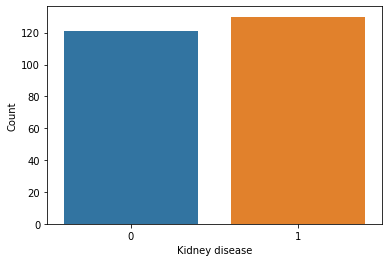

In [20]:
#data visualisation
sns.countplot(x='classification',data=df1)
plt.xlabel('Kidney disease')
plt.ylabel('Count')
plt.show()

<AxesSubplot:>

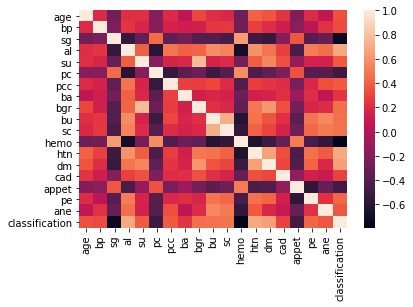

In [21]:
sns.heatmap(df1.corr())

AxesSubplot(0.125,0.125;0.775x0.755)


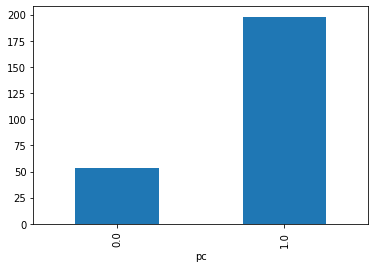

In [22]:
# Counting number of people with normal vs. abnormal pus cells 
print(df1.groupby('pc').pc.count().plot(kind="bar"))

In [23]:
# splitting data
X= df1.drop('classification', axis= 1)
y= df1.classification

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 20, stratify= y)

In [25]:
# Feature Scaling (normalizing range of data)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(),
            'parameters': {
                'C': [1,5,10]
               }
        },
        'gbc' :{
               'model':GradientBoostingClassifier(),
            'parameters':{
                'n_estimators': [10,15,20,50,100,200]
            }
            
        },
        'knn':{
            'model':KNeighborsClassifier(),
            'parameters':{
                'n_neighbors':[5,10,15]
            }

        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svc': {
            'model': SVC(),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    scores = [] 
   
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = 5, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)
    

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.980
1,gbc,{'n_estimators': 15},0.990
2,knn,{'n_neighbors': 5},0.960
3,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.990
4,random_forest,{'n_estimators': 20},1.000
5,svc,"{'C': 1, 'kernel': 'rbf'}",0.985


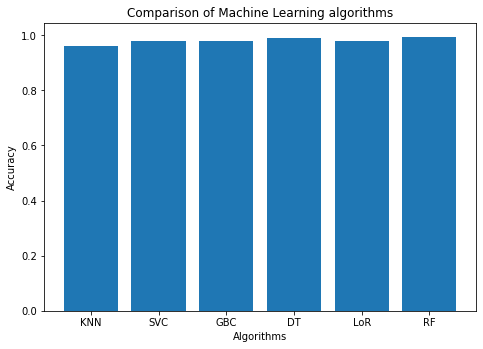

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['KNN','SVC','GBC','DT','LoR','RF']
accuracy = [0.96,0.98,0.98,0.99,0.98,0.995]
ax.bar(models, accuracy)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Algorithms')
ax.set_title('Comparison of Machine Learning algorithms')
plt.show()

# Random Forest

In [30]:
# Random forest since it gave the best score
from sklearn.ensemble import RandomForestClassifier

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 11)]
#max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [31]:
#Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [32]:
# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, search across 100 different combinations, and use all available cores
model = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state = 10, n_jobs = -1)

# Fit the random search model
model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 11, 22, 33, 44, 55, 66,
                                                      77, 88, 99, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=10, verbose=2)

In [33]:
model.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 22,
 'bootstrap': False}

In [34]:
# Manually provide the best parameters to model for training
model_12 = RandomForestClassifier(**{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 88,
 'bootstrap': False})

model_12= model_12.fit(X_train, y_train)

In [35]:
pred_12 = model_12.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report

# Accuracy Score
score = round(accuracy_score(y_test, pred_12),4)*100
print("Accuracy: {}%".format(score))

Accuracy: 100.0%


In [37]:
# Classification Report
print(classification_report(y_test,pred_12))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        26

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



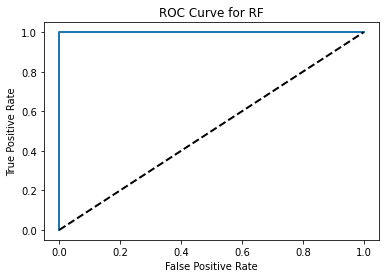

In [95]:
from sklearn.metrics import roc_curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for RF')
    plt.show()
fpr, tpr, t = roc_curve(y_test, pred_12)
plot_roc()

In [38]:
# evaluating the importance of features
model_12.feature_importances_

array([2.62239605e-03, 6.41052814e-03, 1.48731760e-01, 1.32316313e-01,
       9.10322802e-03, 8.97020684e-03, 1.13465143e-03, 0.00000000e+00,
       3.76411981e-02, 3.94321180e-02, 1.94767590e-01, 2.79711969e-01,
       6.73013139e-02, 5.00010624e-02, 1.89143453e-04, 1.89349924e-02,
       2.03501640e-03, 6.96513518e-04])

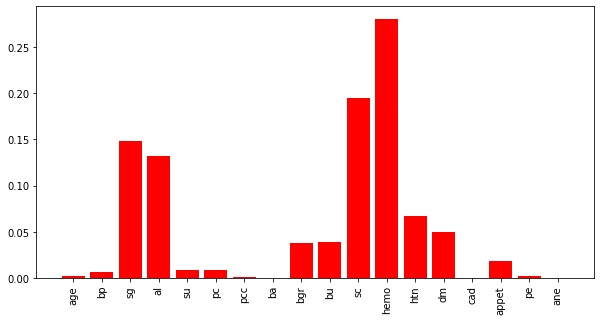

In [39]:
#Plotting feature importances
fig, ax = plt.subplots(figsize=(10,5))
bar_rects = ax.bar(np.arange(18), model_12.feature_importances_, color='r', align='center')
ax.xaxis.set_ticks(np.arange(18))
ax.set_xticklabels(X.columns, rotation='vertical')
plt.show()

In [40]:
# open a file, where you ant to store the data
file = open('kidney_model.pkl', 'wb')

# dump information to that file
pickle.dump(model_12, file)